In [189]:
%matplotlib ipympl

In [190]:
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element
import numpy as np
import scipy
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist, plot_bode
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

In [191]:
#My written functions
def add_noise(z,err):
    #err is the relative SD from mean value
    z_with_noise=np.random.normal(np.real(z),err*np.abs(np.real(z)))+1j*np.random.normal(np.imag(z),err*np.abs(np.imag(z)))
    return z_with_noise

def give_weights(z,wt):
    if (wt=="mod"):
        return np.concatenate((np.abs(z),np.abs(z)))
    elif (wt=="prop"):
        return np.concatenate((np.real(z),np.imag(z)))
    elif (wt=="" or wt=="unit"):
        return np.ones(2*len(z))

def give_xylim(zin,z0):
        zin_real=np.real(zin)
        zin_imag=np.imag(zin)

        z0_real=np.real(z0)
        z0_imag=np.imag(z0)

        max_0=np.maximum(np.max(z0_real),np.max(-z0_imag))
        max_in=np.maximum(np.max(zin_real),np.max(-zin_imag))

        xylim=np.maximum(max_0,max_in)
        return xylim

def find_index_of_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [192]:
@element(num_params=7, units=["Ohm", "Ohm", "Ohm", "","", "F",""],overwrite=True)
def TLMthreeNew(p, f):
    omega = 2 * np.pi * np.array(f)
    R1, R2, R3, delta1, delta2, Q, alpha = p[0], p[1], p[2],p[3], p[4], p[5], p[6]
    delta3=1-delta1-delta2
    k12=R2/R1
    k13=R3/R1
    Rion1=R1
    Rion2=R2
    Rion3=R3
    CTotal1=Q
    CTotal2=Q
    CTotal3=Q
    wc1=1/(Rion1*CTotal1)
    wc2=1/(Rion2*CTotal2)
    wc3=1/(Rion3*CTotal3)
    S1=np.sqrt((omega*1j)**alpha/wc1)
    S2=np.sqrt((omega*1j)**alpha/wc2)
    S3=np.sqrt((omega*1j)**alpha/wc3)
    C1=1/np.tanh(delta1*S1)
    C2=1/np.tanh(delta2*S2)
    C3=1/np.tanh(delta3*S3)

    Z=2*(R1)*((S1*S3*C1*k12**2+S2*C2*(S1*C1*C3*k13+S3)*k12+S2**2*C3*k13)/(S1*(S3*S1*k12**2+S2*C2*(S3*C1+S1*C3*k13)*k12+S2**2*C1*C3*k13)))
    
    return Z

In [193]:
c0=CustomCircuit(initial_guess=[1000,100,500,0.5,0.17,1e-4,1],circuit='TLMthreeNew')
freq = np.logspace(3,-3,num=100)
z0 = c0.predict(freq)
#z1=add_noise(z0,0.05)

In [194]:
param_guess=[1000,100,500,0.12,0.17,1e-4,0.9]
cg1=CustomCircuit(initial_guess=param_guess,circuit='TLMthreeNew')
cg2=CustomCircuit(initial_guess=param_guess,circuit='TLMthreeNew')
cg3=CustomCircuit(initial_guess=param_guess,circuit='TLMthreeNew')
# fit1=cg.fit(freq,z0,sigma=give_weights(z0,"mod"),bounds=(0,[np.inf,np.inf,np.inf,1,1,np.inf,1]))
# zfit1=fit1.predict(freq)
z1=add_noise(z0,0.05)
z2=add_noise(z0,0.05)
z3=add_noise(z0,0.05)


In [195]:
# print(fit1)
# fig, ax=plt.subplots()
# plot_nyquist(zfit1,ax=ax)
# plot_nyquist(z0,ax=ax)
# ax.set_xlim(0,3*np.maximum(np.max(np.real(z0)),np.max(np.imag(z0))))

In [196]:
# def plotter_for_three(freq,circuit0,zin,circuitg,wt):
    
#     c0=circuit0
#     z0=c0.predict(freq)
    
#     cg=circuitg
#     cf=cg.fit(freq,zin,sigma=give_weights(zin,wt),bounds=(0,[np.inf,np.inf,np.inf,1,1,np.inf,1]))
#     zf=cf.predict(freq)

#     p0=c0.initial_guess
#     R1_0, R2_0, R3_0, delta1_0, delta2_0, Q_0, alpha_0 = p0[0], p0[1], p0[2],p0[3], p0[4], p0[5], p0[6]

#     pf=cf.parameters_
#     R1_f, R2_f, R3_f, delta1_f, delta2_f, Q_f, alpha_f = pf[0], pf[1], pf[2],pf[3], pf[4], pf[5], pf[6]

#     linewidth=1
#     ticksize=6
#     color_actual="green"
#     color_noise="red"
#     color_fitted="blue"

#     fig = plt.figure(f"Results at δ1={delta1_0} and δ2={delta2_0}")
#     fig.set_size_inches(10,6)
    
#     #profile fit and profile original
#     ax1= fig.add_subplot(2,3,2)
    # ax1.plot([0,delta1_0,delta1_0,delta2_0,delta2_0,1],[R1_0,R1_0,R2_0,R2_0,R3_0,R3_0],linewidth=linewidth,color=color_actual,label="Actual")
    # ax1.plot([0,delta1_f,delta1_f,delta2_f,delta2_f,1],[R1_f,R1_f,R2_f,R2_f,R3_f,R3_f],linewidth=linewidth,color=color_fitted,label="Fitted")
#     ax1.tick_params(labelsize=ticksize)
#     ax1.axvline(x=delta1_0,ls="--",linewidth=0.6,color=color_actual)
#     ax1.axvline(x=delta2_0,ls="--",linewidth=0.6,color=color_actual)
#     ax1.axvline(x=delta1_f,ls="--",linewidth=0.6,color=color_fitted)
#     ax1.axvline(x=delta2_f,ls="--",linewidth=0.6,color=color_fitted)
#     ax1.set_ylabel("R1 / R2 / R3 (Ω)")
#     ax1.set_xlabel("δ")
#     ax1.set_xmargin(0)
#     ax1.legend()

#     xylim=max(give_xylim(zin,zf),give_xylim(zin,z0))

#     if xylim%1000>=1:
#         units="kΩ"
#         factor=1000
#     else:
#         units="Ω"
#         factor=1

#     #nyquist plot 
#     ax2=fig.add_subplot(2,3,3)
#     ax2.set_xlim(-0.2*xylim/factor,xylim/factor)
#     ax2.set_ylim(-0.2*xylim/factor,xylim/factor)
#     plot_nyquist(z0/factor,ax=ax2,units=units,labelsize=10,fmt="",color=color_actual,linewidth=linewidth,ticksize=ticksize)
#     plot_nyquist(zin/factor,ax=ax2,units=units,labelsize=10,fmt=".",color=color_noise,ms=2,ticksize=ticksize)
#     plot_nyquist(zf/factor,ax=ax2,units=units,labelsize=10,fmt="",color=color_fitted,linewidth=linewidth,ticksize=ticksize)
#     #inset_for_nyquist_plot
#     ax2_inset=ax2.inset_axes(bounds=[0.4,0.4,0.5,0.5])
#     plot_nyquist(z0/factor,ax=ax2_inset,units=units,labelsize=10,fmt="",color=color_actual,linewidth=linewidth,ticksize=ticksize)
#     plot_nyquist(zin/factor,ax=ax2_inset,units=units,labelsize=10,fmt=".",color=color_noise,ms=2,ticksize=ticksize)
#     plot_nyquist(zf/factor,ax=ax2_inset,units=units,labelsize=10,fmt="",color=color_fitted,linewidth=linewidth,ticksize=ticksize)    

#     f_c=1/(R1_0*Q_0)
#     idx=find_index_of_nearest(freq,f_c)
#     z_c=c0.predict([freq[idx]])

#     xylim=np.real(1.2*np.real(z_c))
#     ax2_inset.set_xlim(0,xylim/factor)
#     ax2_inset.set_ylim(0,xylim/factor)
#     ax2_inset.set_xlabel("")
#     ax2_inset.set_ylabel("")
#     ax2.indicate_inset_zoom(ax2_inset)

#     #bode plots
#     ax3a=fig.add_subplot(2,3,5)
#     ax3b=fig.add_subplot(2,3,6)
#     plot_bode(freq,z0/factor,axes=[ax3a,ax3b],units=units,labelsize=10,fmt="",color=color_actual,linewidth=linewidth,ticksize=ticksize)
#     plot_bode(freq,zin/factor,axes=[ax3a,ax3b],units=units,labelsize=10,fmt=".",color=color_noise,ms=2,ticksize=ticksize)
#     plot_bode(freq,zf/factor,axes=[ax3a,ax3b],units=units,labelsize=10,fmt="",color=color_fitted,linewidth=linewidth,ticksize=ticksize)


#     pf[0]=np.around(pf[0],decimals=0,out=None)
#     pf[1]=np.around(pf[1],decimals=0,out=None)
#     pf[2]=np.around(pf[2],decimals=0,out=None)
#     pf[3]=np.around(pf[3],decimals=3,out=None)
#     pf[4]=np.around(pf[4],decimals=3,out=None)
#     pf[5]=np.around(pf[5],decimals=6,out=None)
#     pf[6]=np.around(pf[6],decimals=3,out=None)

#     p0[0]=np.around(p0[0],decimals=0,out=None)
#     p0[1]=np.around(p0[1],decimals=0,out=None)
#     p0[2]=np.around(p0[2],decimals=0,out=None)
#     p0[3]=np.around(p0[3],decimals=3,out=None)
#     p0[4]=np.around(pf[4],decimals=3,out=None)
#     p0[5]=np.around(pf[5],decimals=6,out=None)
#     p0[6]=np.around(pf[6],decimals=3,out=None)

#     data =np.array([p0,pf, (p0-pf)*100/(p0)])
#     #cell_colors=[["blue","blue","blue","blue"],["green","green","green","green"]]
    
    
#     ax4=fig.add_subplot(1,3,1)
#     ax4.set_axis_off()
#     pm_table=ax4.table(np.transpose(data),colLabels=["Actual","Fitted","% Error"],rowLabels=["R1","R2","R3","δ1","δ2","Q","α"],loc="center")
#     pm_table.auto_set_font_size(False)
#     pm_table.set_fontsize(10)
#     plt.savefig("ggg.png")

    

In [197]:
def plotter_for_three(freq,circuit0,zin1,zin2,zin3,circuitg1,circuitg2,circuitg3,wt):
    
    c0=circuit0
    z0=c0.predict(freq)
    cg1=circuitg1
    cg2=circuitg2
    cg3=circuitg3
    cf1=cg1.fit(freq,zin1,sigma=give_weights(zin1,wt),bounds=(0,[np.inf,np.inf,np.inf,1,1,np.inf,1]))
    #print(cf1)
    cf2=cg2.fit(freq,zin2,sigma=give_weights(zin2,wt),bounds=(0,[np.inf,np.inf,np.inf,1,1,np.inf,1]))
    cf3=cg3.fit(freq,zin3,sigma=give_weights(zin3,wt),bounds=(0,[np.inf,np.inf,np.inf,1,1,np.inf,1]))
    #print(cg3)

    zf1=cf1.predict(freq)
    zf2=cf2.predict(freq)
    zf3=cf3.predict(freq)

    p0=c0.initial_guess
    R1_0, R2_0, R3_0, delta1_0, delta2_0, Q_0, alpha_0 = p0[0], p0[1], p0[2],p0[3], p0[4], p0[5], p0[6]

    pg=cg1.initial_guess
    R1_g, R2_g, R3_g, delta1_g, delta2_g, Q_g, alpha_g = pg[0], pg[1], pg[2],pg[3], pg[4], pg[5], pg[6]   

    pf1=cg1.parameters_
    R1_f1, R2_f1, R3_f1, delta1_f1, delta2_f1, Q_f1, alpha_f1 = pf1[0], pf1[1], pf1[2],pf1[3], pf1[4], pf1[5], pf1[6]   
 
    pf2=cg2.parameters_
    R1_f2, R2_f2, R3_f2, delta1_f2, delta2_f2, Q_f2, alpha_f2 = pf2[0], pf2[1], pf2[2],pf2[3], pf2[4], pf2[5], pf2[6] 

    pf3=cf3.parameters_
    R1_f3, R2_f3, R3_f3, delta1_f3, delta2_f3, Q_f3, alpha_f3 = pf3[0], pf3[1], pf3[2],pf3[3], pf3[4], pf3[5], pf3[6] 

    linewidth=1
    linewidth_actual=3
    ticksize=6
    color_actual="red"
    color_noise1=[0,0.5,0]
    color_noise2=[0.2,0.4,0.2]
    color_noise3=[0,0.65,0.4]
    color_fitted1=[0,0,1]
    color_fitted2=[0.4,0.58,0.65]
    color_fitted3=[0,0.6,1]

    fig = plt.figure(f"Results at δ1={delta1_0} δ2={delta2_0}")
    fig.set_size_inches(10,6)
    
    #profile fit and profile original
    ax1=plt.subplot2grid((5,4),(1,0),rowspan=2,colspan=2)
    #ax1= fig.add_subplot(2,4,1)
    ax1.plot([0,delta1_0,delta1_0,delta2_0+delta1_0,delta2_0+delta1_0,1],[R1_0,R1_0,R2_0,R2_0,R3_0,R3_0],linewidth=linewidth_actual,color=color_actual,label="Actual")
    ax1.plot([0,delta1_f1,delta1_f1,delta2_f1+delta1_f1,delta2_f1+delta1_f1,1],[R1_f1,R1_f1,R2_f1,R2_f1,R3_f1,R3_f1],linewidth=linewidth,color=color_fitted1,label="Fitted 1")
    ax1.plot([0,delta1_f2,delta1_f2,delta2_f2+delta1_f2,delta2_f2+delta1_f2,1],[R1_f2,R1_f2,R2_f2,R2_f2,R3_f2,R3_f2],linewidth=linewidth,color=color_fitted2,label="Fitted 2")
    ax1.plot([0,delta1_f3,delta1_f3,delta2_f3+delta1_f3,delta2_f3+delta1_f3,1],[R1_f3,R1_f3,R2_f3,R2_f3,R3_f3,R3_f3],linewidth=linewidth,color=color_fitted3,label="Fitted 3")

    ax1.tick_params(labelsize=ticksize)
    ax1.axvline(x=delta1_0,ls="--",linewidth=0.3,color=color_actual)
    ax1.axvline(x=delta2_0+delta1_0,ls="--",linewidth=0.3,color=color_actual)
    ax1.axvline(x=delta1_f1,ls="--",linewidth=0.3,color=color_fitted1)
    ax1.axvline(x=delta2_f1+delta1_f1,ls="--",linewidth=0.3,color=color_fitted1)
    ax1.axvline(x=delta1_f2,ls="--",linewidth=0.3,color=color_fitted2)
    ax1.axvline(x=delta2_f2+delta1_f2,ls="--",linewidth=0.3,color=color_fitted2)
    ax1.axvline(x=delta1_f3,ls="--",linewidth=0.3,color=color_fitted3)
    ax1.axvline(x=delta2_f3+delta1_f3,ls="--",linewidth=0.3,color=color_fitted3)
    ax1.set_ylabel("R1 / R2 / R3 (Ω)")
    ax1.set_xlabel("δ")
    ax1.set_xmargin(0)
    leg=ax1.legend()
    for line in leg.get_lines():
        line.set_linewidth(3)

    xylim=max(give_xylim(zin1,zf1),give_xylim(zin1,z0))

    if xylim%1000>=1:
        units="kΩ"
        factor=1000
    else:
        units="Ω"
        factor=1

    #nyquist plot 
    #ax2=fig.add_subplot(1,2,2)
    ax2=plt.subplot2grid((5,4),(1,2),colspan=2,rowspan=4)
    ax2.set_xlim(-0.2*xylim/factor,xylim/factor)
    ax2.set_ylim(-0.2*xylim/factor,xylim/factor)
    plot_nyquist(zin1/factor,ax=ax2,units=units,labelsize=10,fmt=".",color=color_noise1,ms=2,ticksize=ticksize)
    plot_nyquist(zin2/factor,ax=ax2,units=units,labelsize=10,fmt=".",color=color_noise2,ms=2,ticksize=ticksize)
    plot_nyquist(zin3/factor,ax=ax2,units=units,labelsize=10,fmt=".",color=color_noise3,ms=2,ticksize=ticksize)
    plot_nyquist(zf1/factor,ax=ax2,units=units,labelsize=10,fmt="",color=color_fitted1,linewidth=linewidth,ticksize=ticksize)
    plot_nyquist(zf2/factor,ax=ax2,units=units,labelsize=10,fmt="",color=color_fitted2,linewidth=linewidth,ticksize=ticksize)
    plot_nyquist(zf3/factor,ax=ax2,units=units,labelsize=10,fmt="",color=color_fitted3,linewidth=linewidth,ticksize=ticksize)
    plot_nyquist(z0/factor,ax=ax2,units=units,labelsize=10,fmt="",color=color_actual,linewidth=linewidth,ticksize=ticksize)
    #inset_for_nyquist_plot
    ax2_inset=ax2.inset_axes(bounds=[0.4,0.1,0.5,0.5])
    plot_nyquist(zin1/factor,ax=ax2_inset,units=units,labelsize=10,fmt=".",color=color_noise1,ms=2,ticksize=ticksize)
    plot_nyquist(zin2/factor,ax=ax2_inset,units=units,labelsize=10,fmt=".",color=color_noise2,ms=2,ticksize=ticksize)
    plot_nyquist(zin3/factor,ax=ax2_inset,units=units,labelsize=10,fmt=".",color=color_noise3,ms=2,ticksize=ticksize)
    plot_nyquist(zf1/factor,ax=ax2_inset,units=units,labelsize=10,fmt="",color=color_fitted1,linewidth=linewidth,ticksize=ticksize)    
    
    plot_nyquist(zf2/factor,ax=ax2_inset,units=units,labelsize=10,fmt="",color=color_fitted2,linewidth=linewidth,ticksize=ticksize)    
    
    plot_nyquist(zf3/factor,ax=ax2_inset,units=units,labelsize=10,fmt="",color=color_fitted3,linewidth=linewidth,ticksize=ticksize)    
    plot_nyquist(z0/factor,ax=ax2_inset,units=units,labelsize=10,fmt="",color=color_actual,linewidth=linewidth,ticksize=ticksize)
    
    f_c=1/(R1_0*Q_0)
    idx=find_index_of_nearest(freq,f_c)
    z_c=c0.predict([freq[idx]])

    xylim_inset=1.2*np.real(z_c)
    ax2_inset.set_xlim(0,xylim_inset/factor)
    ax2_inset.set_ylim(0,xylim_inset/factor)
    ax2_inset.set_xlabel("")
    ax2_inset.set_ylabel("")
    ax2.indicate_inset_zoom(ax2_inset)

    ax2_inset1=ax2.inset_axes(bounds=[0.4,0.7,0.3,0.2])
    plot_nyquist(zin1/factor,ax=ax2_inset1,units=units,labelsize=10,fmt=".",color=color_noise1,ms=2,ticksize=ticksize)
    plot_nyquist(zin2/factor,ax=ax2_inset1,units=units,labelsize=10,fmt=".",color=color_noise2,ms=2,ticksize=ticksize)
    plot_nyquist(zin3/factor,ax=ax2_inset1,units=units,labelsize=10,fmt=".",color=color_noise3,ms=2,ticksize=ticksize)
    plot_nyquist(zf1/factor,ax=ax2_inset1,units=units,labelsize=10,fmt="",color=color_fitted1,linewidth=linewidth,ticksize=ticksize)    
    
    plot_nyquist(zf2/factor,ax=ax2_inset1,units=units,labelsize=10,fmt="",color=color_fitted2,linewidth=linewidth,ticksize=ticksize)    
    
    plot_nyquist(zf3/factor,ax=ax2_inset1,units=units,labelsize=10,fmt="",color=color_fitted3,linewidth=linewidth,ticksize=ticksize)    
    plot_nyquist(z0/factor,ax=ax2_inset1,units=units,labelsize=10,fmt="",color=color_actual,linewidth=linewidth,ticksize=ticksize)
    
    f_c=1/(1000*R1_0*Q_0)

    f_c=freq[len(freq)-1]*2
    idx=find_index_of_nearest(freq,f_c)
    z0c=c0.predict([freq[idx]])
    zfc1=cf1.predict([freq[idx]])
    zfc2=cf2.predict([freq[idx]])
    zfc3=cf3.predict([freq[idx]])
    
    max_xlim_inset=np.max([np.real(z0c),np.real(zfc1),np.real(zfc2),np.real(zfc3)])
    max_ylim_inset=np.max([-np.imag(z0c),-np.imag(zfc1),-np.imag(zfc2),-np.imag(zfc3)])
    min_xlim_inset=np.min([np.real(z0c),np.real(zfc1),np.real(zfc2),np.real(zfc3)])
    min_ylim_inset=np.min([-np.imag(z0c),-np.imag(zfc1),-np.imag(zfc2),-np.imag(zfc3)])
    gap=(max_xlim_inset-min_xlim_inset)/factor
    print(gap)
    # ax2_inset1.set_xlim(xlim_inset/factor,1.01*xlim_inset/factor)
    # ax2_inset1.set_ylim(ylim_inset/factor,1.01*xlim_inset/factor)
    # ax2_inset1.set_xlim(min_xlim_inset/factor-0.1*max_xlim_inset/factor,1.1*max_xlim_inset/factor)
    # ax2_inset1.set_ylim(min_ylim_inset/factor-0.1*max_xlim_inset/factor,min_ylim_inset/factor+0.1*max_xlim_inset/factor)
    
    ax2_inset1.set_xlim(min_xlim_inset/factor-2*gap,2*gap+max_xlim_inset/factor)
    ax2_inset1.set_ylim(min_ylim_inset/factor-2*gap,min_ylim_inset/factor+2*gap)
    ax2_inset1.set_aspect("equal")
    ax2_inset1.set_xlabel("")
    ax2_inset1.set_ylabel("")
    ax2_inset1.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    ax2_inset1.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    ax2.indicate_inset_zoom(ax2_inset1)


    #bode plots
    #ax3a=fig.add_subplot(2,4,5)
    #ax3b=fig.add_subplot(2,4,6)
    ax3a=plt.subplot2grid((5,4),(3,0),colspan=1,rowspan=2)
    ax3b=plt.subplot2grid((5,4),(3,1),colspan=1,rowspan=2)
    plot_bode(freq,zin1/factor,axes=[ax3a,ax3b],units=units,labelsize=10,fmt=".",color=color_noise1,ms=2,ticksize=ticksize)
    plot_bode(freq,zin2/factor,axes=[ax3a,ax3b],units=units,labelsize=10,fmt=".",color=color_noise2,ms=2,ticksize=ticksize)
    plot_bode(freq,zin3/factor,axes=[ax3a,ax3b],units=units,labelsize=10,fmt=".",color=color_noise3,ms=2,ticksize=ticksize)
    plot_bode(freq,zf1/factor,axes=[ax3a,ax3b],units=units,labelsize=10,fmt="",color=color_fitted1,linewidth=linewidth,ticksize=ticksize)
    plot_bode(freq,zf2/factor,axes=[ax3a,ax3b],units=units,labelsize=10,fmt="",color=color_fitted2,linewidth=linewidth,ticksize=ticksize)
    plot_bode(freq,zf3/factor,axes=[ax3a,ax3b],units=units,labelsize=10,fmt="",color=color_fitted3,linewidth=linewidth,ticksize=ticksize)
    plot_bode(freq,z0/factor,axes=[ax3a,ax3b],units=units,labelsize=10,fmt="",color=color_actual,linewidth=linewidth,ticksize=ticksize)


    percent_err1=(p0-pf1)*100/(p0)
    percent_err2=(p0-pf2)*100/(p0)
    percent_err3=(p0-pf3)*100/(p0)

    p0_table=[R1_0, R2_0, R3_0, delta1_0, delta2_0, Q_0, alpha_0]
    pf1_table=[R1_f1, R2_f1, R3_f1, delta1_f1, delta2_f1, Q_f1, alpha_f1]
    pf2_table=[R1_f2, R2_f2, R3_f2, delta1_f2, delta2_f2, Q_f2, alpha_f2]
    pf3_table=[R1_f3, R2_f3, R3_f3, delta1_f3, delta2_f3, Q_f3, alpha_f3]
    pg_table=[R1_g, R2_g, R3_g, delta1_g, delta2_g, Q_g, alpha_g]

    percent_err_table1=percent_err1
    percent_err_table2=percent_err2
    percent_err_table3=percent_err3

    def make_values_for_table(arr):
        for i in range(0,len(arr)):
            arr[i]="{:.2e}".format(arr[i])
        return arr
    
    pf1_table=make_values_for_table(pf1_table)
    pf2_table=make_values_for_table(pf2_table)
    pf3_table=make_values_for_table(pf3_table)
    p0_table=make_values_for_table(p0_table)
    pg_table=make_values_for_table(pg_table)
    percent_err_table1=make_values_for_table(percent_err_table1)
    percent_err_table2=make_values_for_table(percent_err_table2)
    percent_err_table3=make_values_for_table(percent_err_table3)

    data =np.array([p0_table,pg_table,pf1_table,percent_err_table1,pf2_table,percent_err_table2,pf3_table,percent_err_table3])
    #cell_colors=[["blue","blue","blue","blue"],["green","green","green","green"]]
    
    
    ax4=plt.subplot2grid((5,4),(0,0),colspan=4,rowspan=1)
    ax4.set_axis_off()
    colwidth=np.full((8),0.1)
    pm_table=ax4.table(np.transpose(data),colLabels=["Actual","Guess","Fitted 1","% Error","Fitted 2","% Error","Fitted 3","% Error"],colWidths=colwidth,rowLabels=[f"R1 [Ω]","R2 [Ω]","R3 [Ω]","δ1","δ2","Q [Fs^(1-α)]","α"],loc="center") 
    pm_table.auto_set_font_size(False)
    pm_table.set_fontsize(8)

    fig.tight_layout(pad=0.5)

11.626934601535257


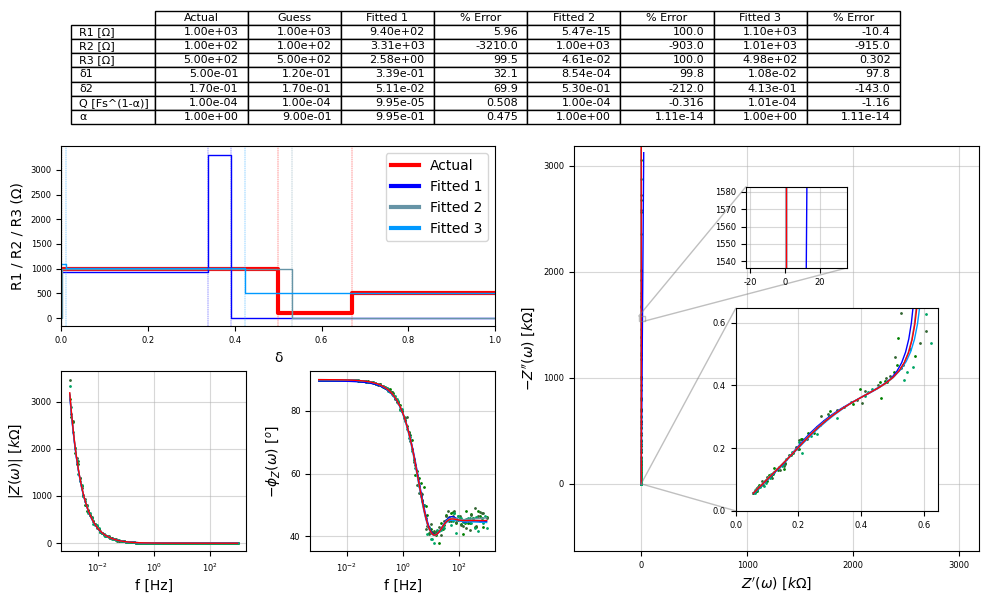

In [198]:
plt.close()
plotter_for_three(freq=freq,circuit0=c0,zin1=z1,zin2=z2,zin3=z3,circuitg1=cg1,circuitg2=cg2,circuitg3=cg3,wt="mod")
plt.show()